# Analiza podatkov o IMDB-jevi lestvici najboljših 250 serij po ocenah ljudi

Ta zvezek vsebuje analizo podatkov o IMDB-jevi lestvici, pomožni skripti za analizo so v parse_data/helpers.

Analizirali bomo:
- 1. Porazdelitev serij po tipu (serijia ali miniserija)
- 2. Porazdelitev tipa serij po državi izvora
- 3. Porazdelitev serij po letih
- 4. Porazdelitev po pogostosti medijskih kanalov in produkcijskih hiš
- 5. Porazdelitev IMDB ocen glede na dolžino
- 6. Porazdelitev IMDB ocen glede na št. episod in št. serij
- 7. Porazdelitev žanrov po letih
- 8. Porazdelitev sodelujocih ljudi v kateremkoli delu nastajanja serij


In [25]:
# ## AUTORELOADING OF MODULES
import conf.jupyter_notebook_conf  # noqa: F401

In [26]:
import pandas as pd


path_to_full_data_csv = "./../../output/toptv_shows_full_data.csv"
df = pd.read_csv(path_to_full_data_csv)

# Popravki za boljšo preglednost
# "Korea, Republic of" = South Korea
df["trakt_country_of_origin"] = df["trakt_country_of_origin"].replace({"Korea, Republic of": "South Korea"})

### 1. Analiza serij po tipu serije
Najprej lahko na hitro pogledamo koliko je med top 250 serijami dejansko serij in koliko miniserij ter to še procentualno izrazimo
Serije so ponavadi daljše, več sezon, medtem ko imajo miniserije ponavadi od 3 do 10 epizod in načeloma samo eno sezono

In [ ]:

from helpers.serije_miniserije import tabela_serije_miniserije_razmerje

tabela_serije_miniserije_razmerje(df)

,Tip serije,Št. serij,% Serij
0,Vse skupaj,250,100 %
1,TV Series,211,84 %
2,TV Mini Series,39,15 %


### 2. Analiza tipa serij po državi izvora
Zdaj lahko primerjamo še po državah, glede na serije in miniserije in oboje skupaj, ter tudi spet še procentualno

In [ ]:
from helpers.serije_miniserije import tabela_serije_miniserije_po_drzavah

tabela_serije_miniserije_po_drzavah(df)

,Država izvora,Št. vseh serij,Serije,Miniserije,% Serije,% Miniserije
0,Australia,2,2,0,100 %,0 %
1,Canada,5,4,1,80 %,20 %
2,France,2,1,1,50 %,50 %
3,Germany,2,1,1,50 %,50 %
4,India,12,11,1,92 %,8 %
5,Ireland,1,1,0,100 %,0 %
6,Italy,2,2,0,100 %,0 %
7,Japan,28,26,2,93 %,7 %
8,Mexico,1,1,0,100 %,0 %
9,New Zealand,1,0,1,0 %,100 %


Ker vidimo, da miniserije predstavljajo samo 15 procentov vsega, jih bomo od zdaj naprej obravnavali skupaj

### 3. Analiza po letih
sedaj bomo pogledali koliko serij je bilo aktivnih v posameznik letih (da se niso zaključile)
tiste, ki se torej še snemajo, bomo označili leto zaključka kot letos.
Lahko bi rekli da bomo videli 'zlata leta' serij.

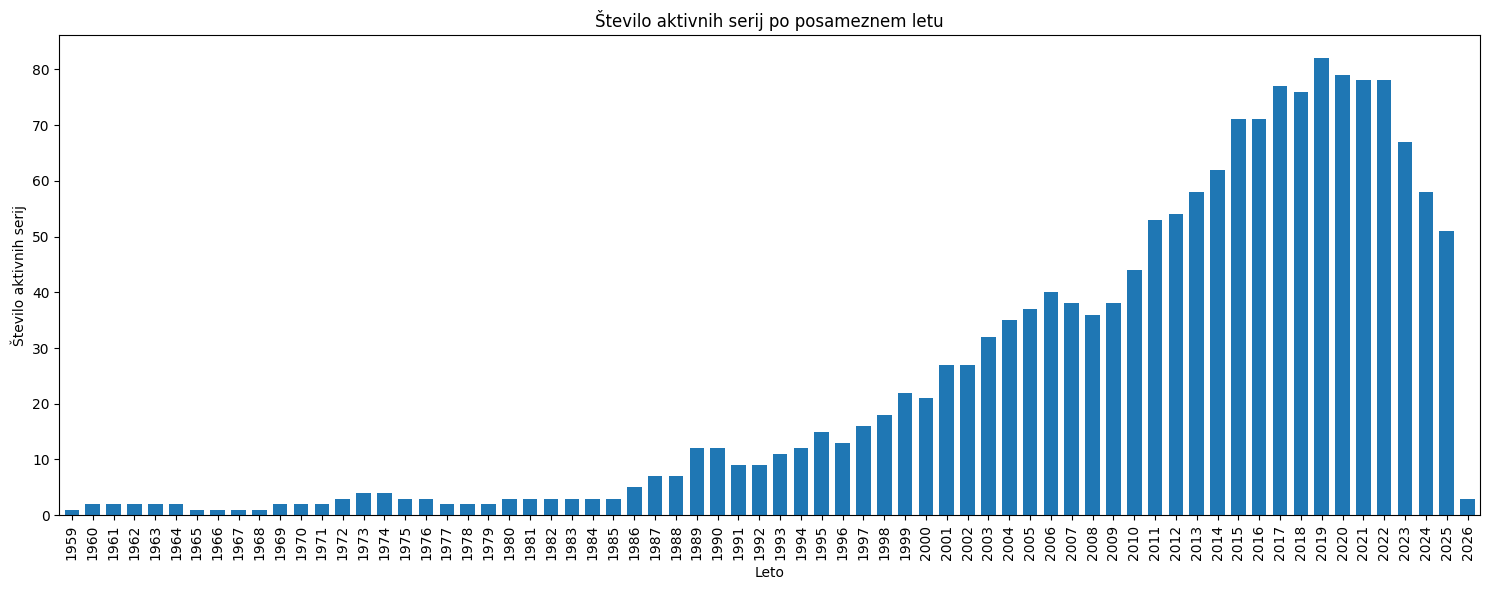

In [29]:
from helpers.years import plot_active_series_years

plot_active_series_years(df)

### 4. Analiza po pogostosti medijskih kanalov in produkcijskih hiš
Poglejmo si še kateri kanali in produkcijske hiše dominirajo pri 'serviranju' in 'proizvajanju' serij.
Da bo malo bolj jasno, kaj sploh je kaj:
##### funkcije kanalov so, da:
- Izbirajo in naročajo vsebino, ki jo želijo predvajati (nakup pravic ali produkcija lastnih serij).
- Promovirajo serije in določajo urnike predvajanja, tudi sofinancirajo
- Skrbijo za distribucijo vsebine do gledalcev. Lahko digitalno (Netflix, Hulu), tradiciconalno (AMC, BBC, tako kot pri nas npr. RTV), ali pa satelitske firme
##### funckije produkcijskih hiš pa da:
Kaj so produkcijske hiše (studios)?
- Dejansko organizirajo snemanja, režijo, scenariste, igralce, tehnično osebje itd.
- Poskrbijo za razvoj scenarija, snemalne lokacije, postprodukcijo (montažo, specialne efekte, zvok).
- Lahko delujejo kot neodvisni producenti ali so del večjih medijskih konglomeratov.
- Po končani produkciji pogosto serijo prodajo ali oddajo kanalu ali streaming platformi za distribucijo.

Na spodnjih dveh grafih pogostost pomeni, pri kolikih serijah se je pojavil/a določena produkcijska hiša, kanal

Na tortnih prikazih pa vidimo delež sodelujočih produkcijska hiš in kanalov glede na vse serije, pod ostalo gredo
sodelujoči, ki so sodelovali v manj kot 1 % vseh serij.
(Vidimo lahko, kako je v resnici zelo porazdeljeno, kdo vse sodeluje pri serviranju in proizvajanju serij
in da velikani sploh ne dominirajo prav veliko, še posebej pri produkcijskih hišah)


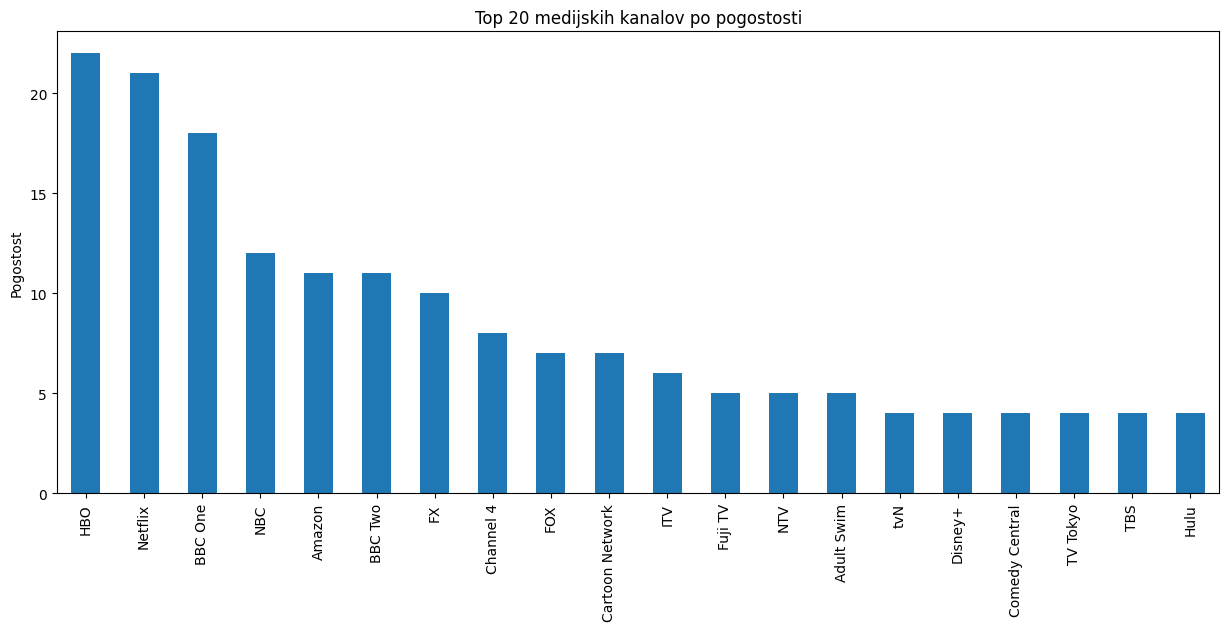

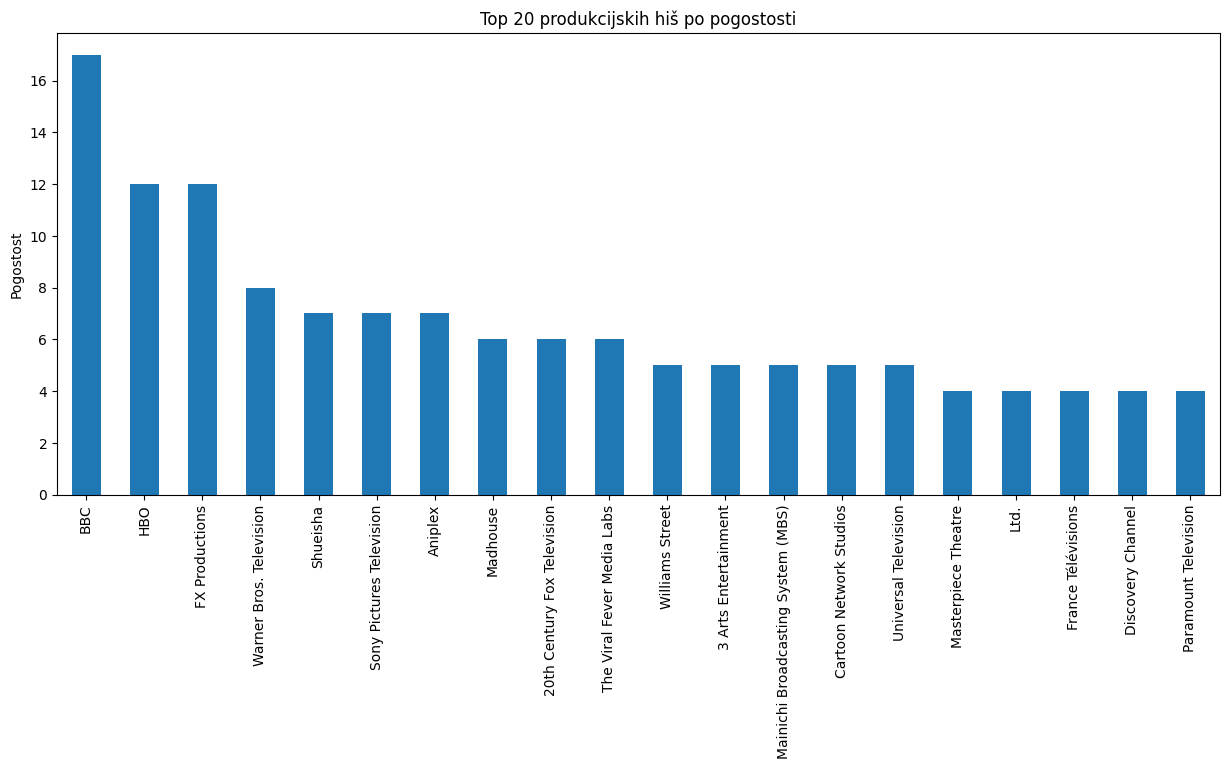

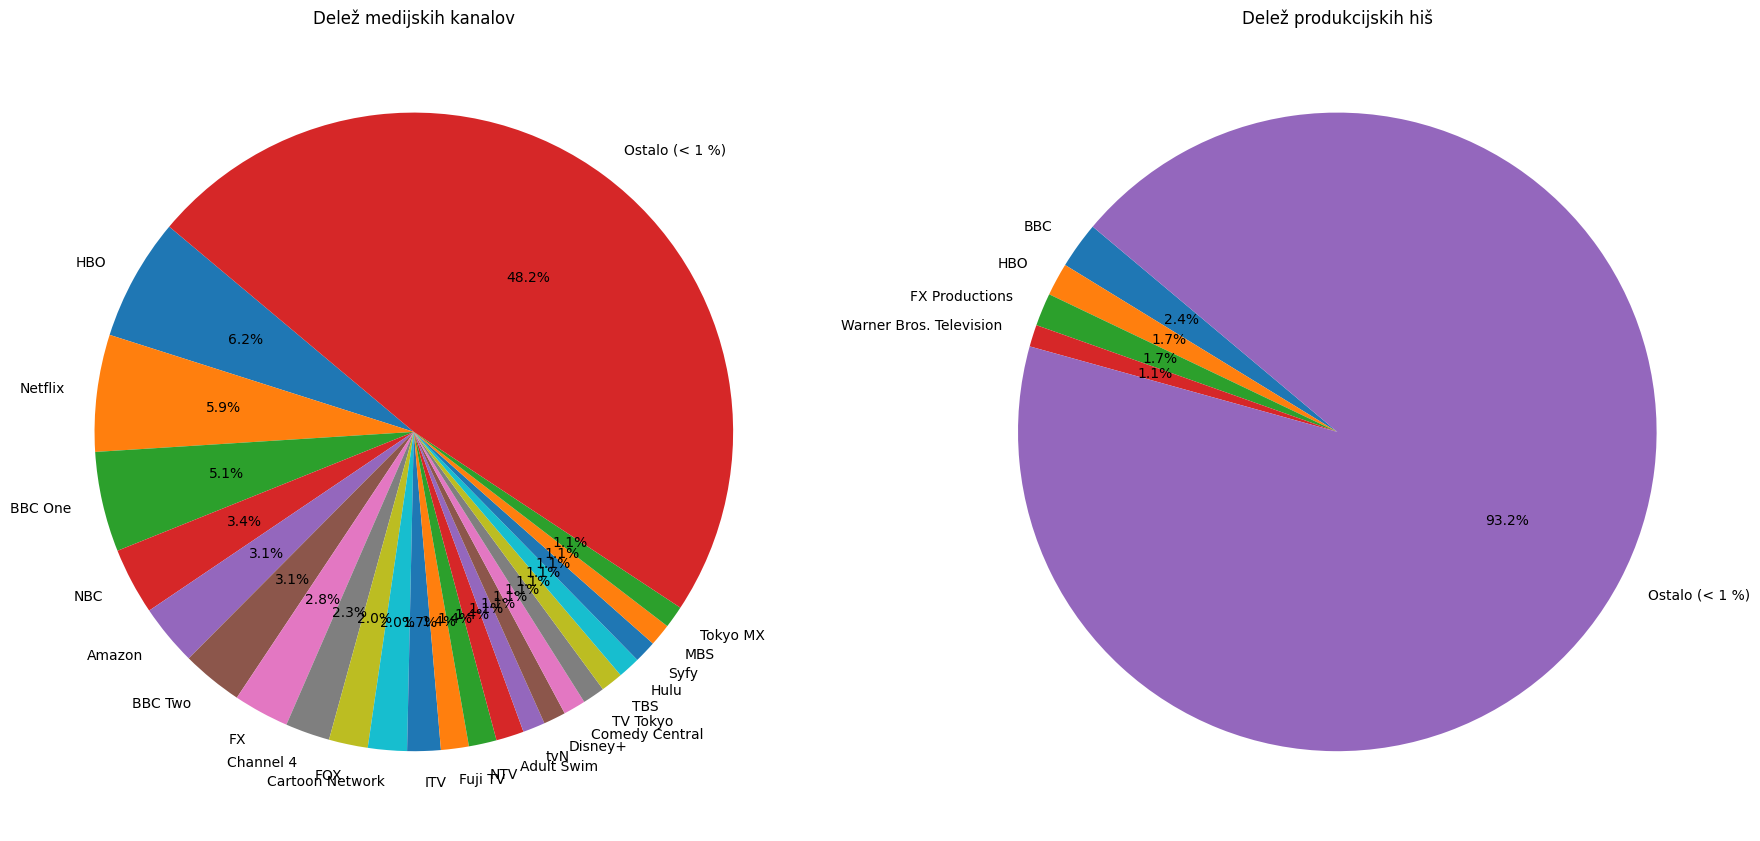

In [30]:
from helpers.networks_studios import  plot_networks_studios

plot_networks_studios(df)

### 5. Analiza IMDB ocen glede na dolžino
Tole je že malo bolj specifično, zanima nas, ali dolžina oz. trajanje serije vpliva na št. oddanih glasov na imdb-ju oz.
kaj je 'the sweet spot' dolžina za največ oddanih glasov. Gledali bomo trajnaje celotne serije (prva 2 grafa)
in tudi po povprečnem trajanju posameznega dela

In [31]:
from helpers.duration_ratings import (
    compare_runtime_votes_ratings_normalized_axis,
    compare_runtime_votes_ratings_non_normalized_axis,
    compare_avg_ep_runtime_votes_ratings_normalized_axis
)

compare_runtime_votes_ratings_normalized_axis(df)

compare_runtime_votes_ratings_non_normalized_axis(df)

compare_avg_ep_runtime_votes_ratings_normalized_axis(df)

### 6. Analiza IMDB ocen glede na št. episod in št. serij
To je poenostavljena varianta od prej. Tukaj gledamo kako št. sezon in št. vseh epizod vpliva na IMDB ocene, ker je recimo podobno (oz. preverjamo ce je res) kot trajanja v minutah. (Isto lahko opazimo, da je več krajših serij, in načeloma imajo krajše bolj razprešene ocene, tudi več ljudi jih oceni).

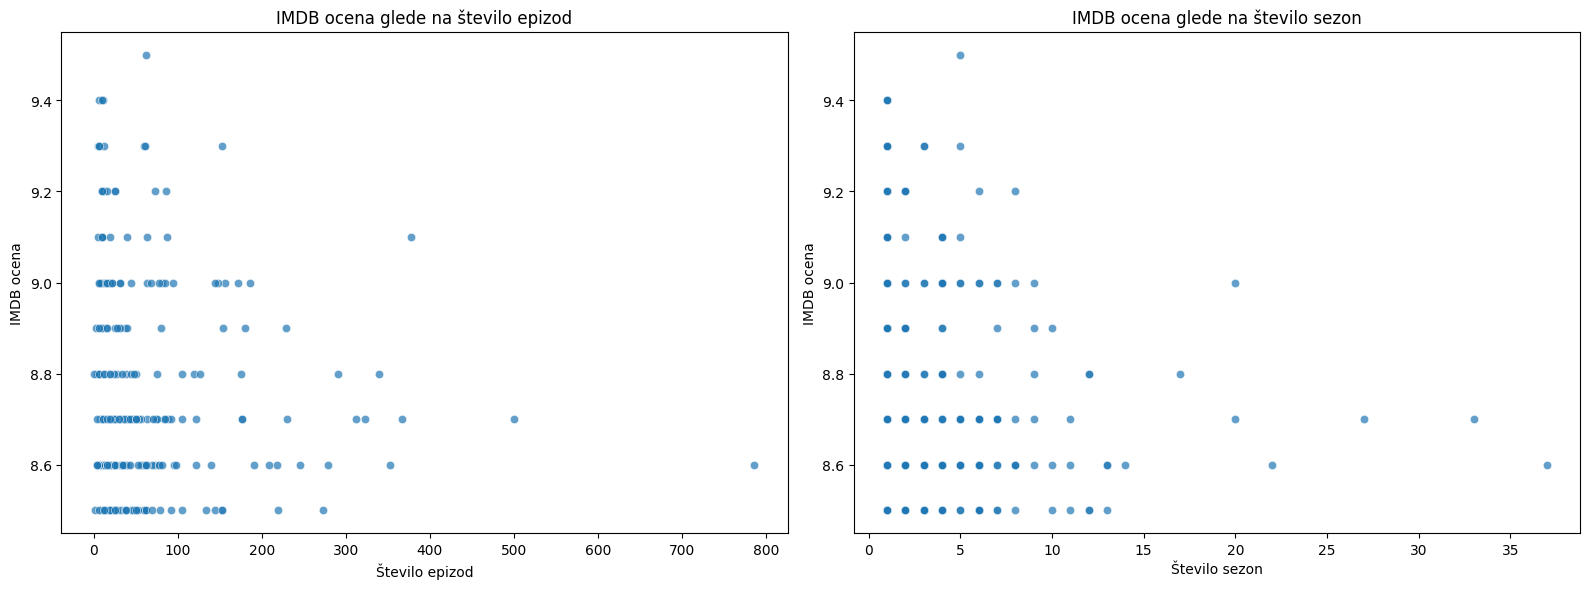

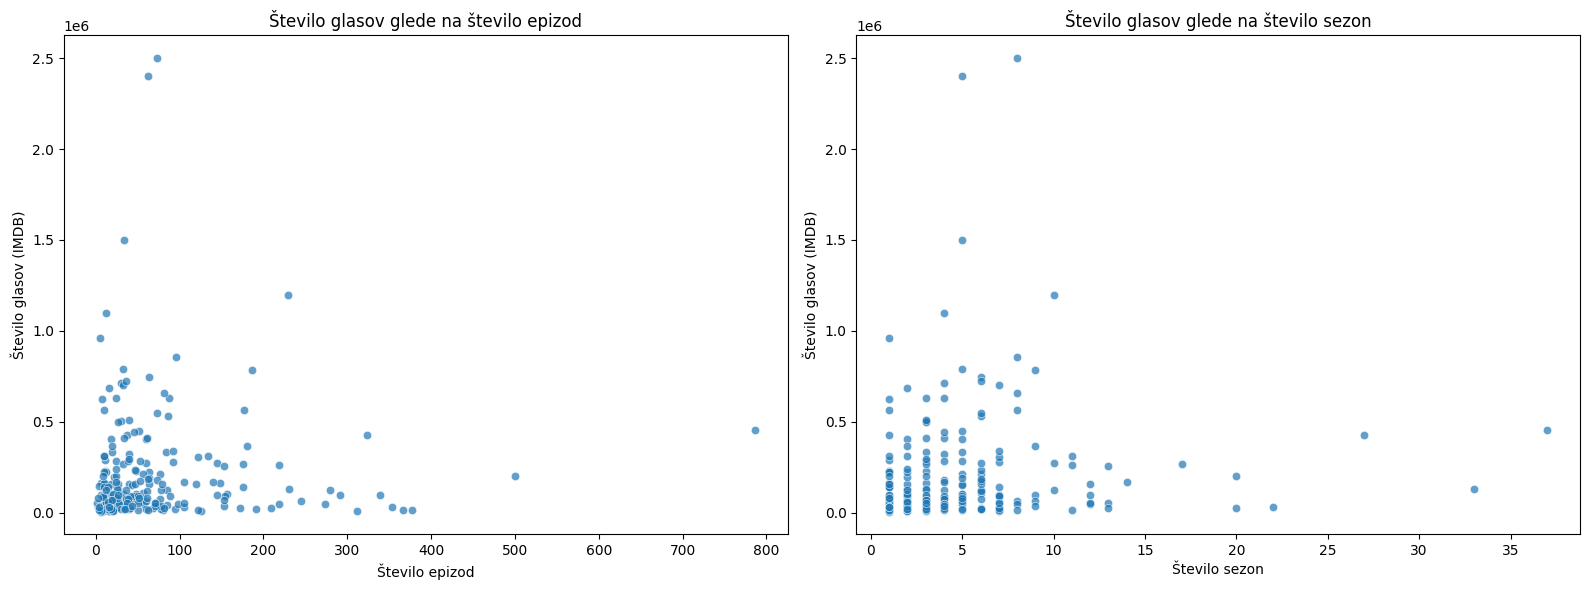

In [32]:
from helpers.s_e_counts_ratings import (
    plot_rating_episodes_seasons_counts,
    plot_vote_count_episodes_seasons_counts
)

plot_rating_episodes_seasons_counts(df)
plot_vote_count_episodes_seasons_counts(df)

### 7. Analiza žanrov po letih
Za vsako leto poglejmo katere serije so bile aktivne in preštejemo število pojavitev žanrov za posamezno leto

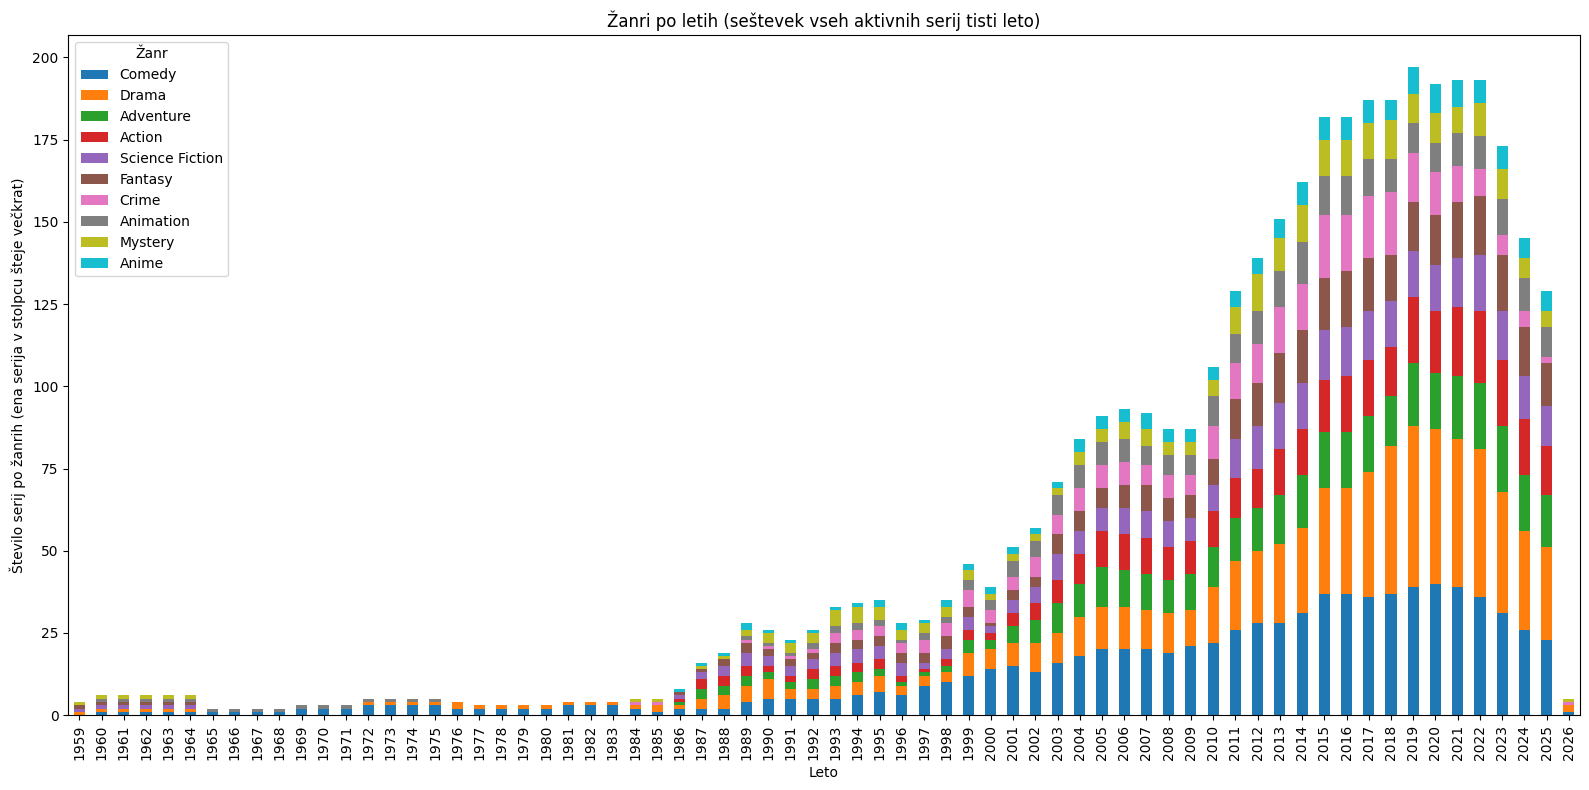

In [40]:
from helpers.genres_years import plot_genres_years

plot_genres_years(df)

### 8. Analiza sodelujocih ljudi v kateremkoli delu nastajanja serij
Tukaj bomo najprej pogledali, koliko ljudi se prekriva če bi bili razdeljeni v tri glavne skupine, in sicer:
- Igralci – redni ali gostujoči igralci,
- Ustvarjalci – zajema ustvarjalce in scenariste (trakt_created_by, wiki_written_by),
- Produkcija – vse ostale skupine pridobljene iz wikipedije (režiserje, izvršne režiserje, direktorje fotografije in montažerje).
(Tako malo za občutek razmerij med skupinami in kako se prekrivajo)

Nato pa smo še za vsako od teh skupin
- Združili vsa imena sodelujočih oseb po serijah,
- Prešteli, kolikokrat se posamezno ime pojavi v različnih serijah,
- In prikazali 30 najpogostejših imen v vsaki skupini z vrstičnimi grafikoni.

S tem smo dobili vpogled v to, kateri posamezniki so najbolj pogosto sodelovali pri več različnih serijah pri različnih področjih.

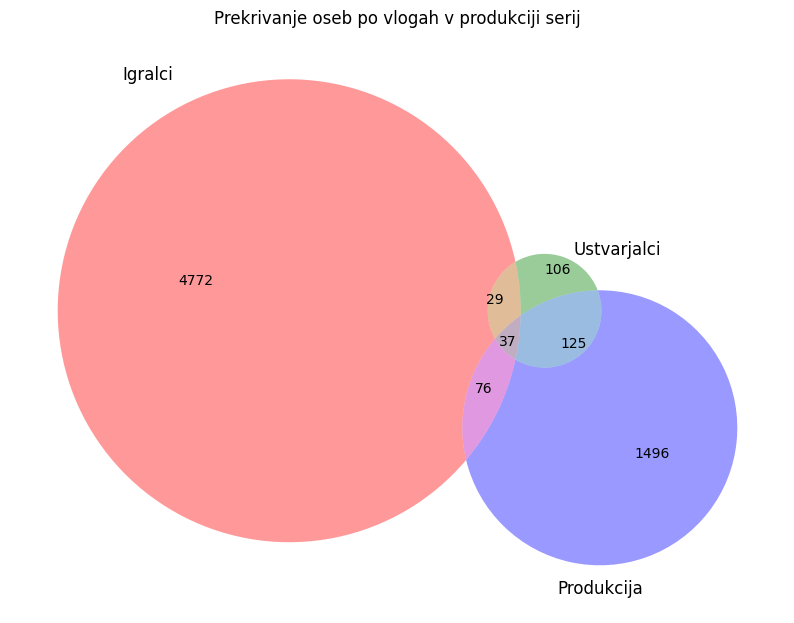

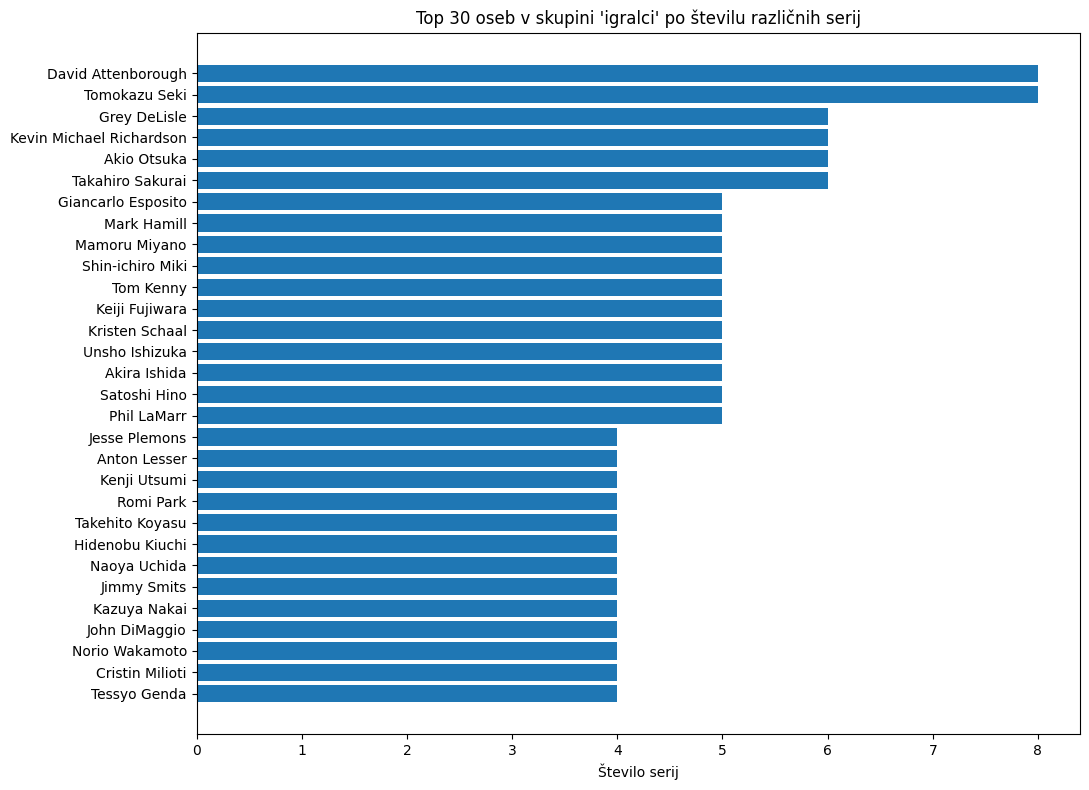

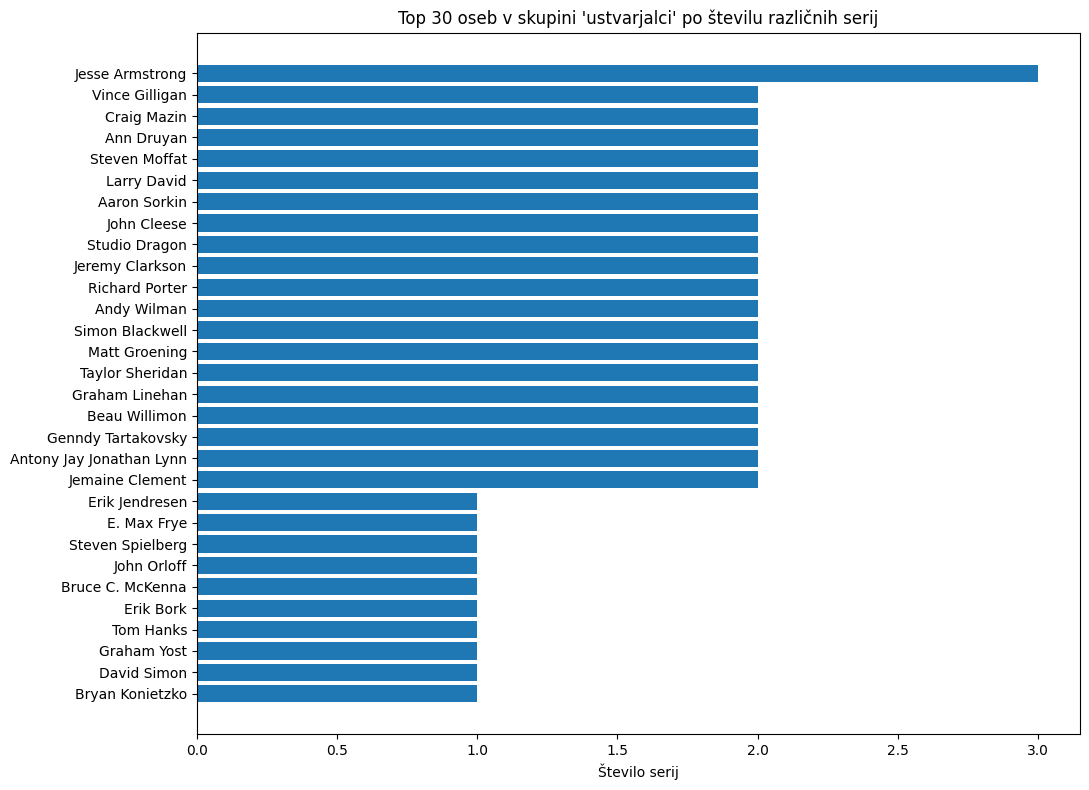

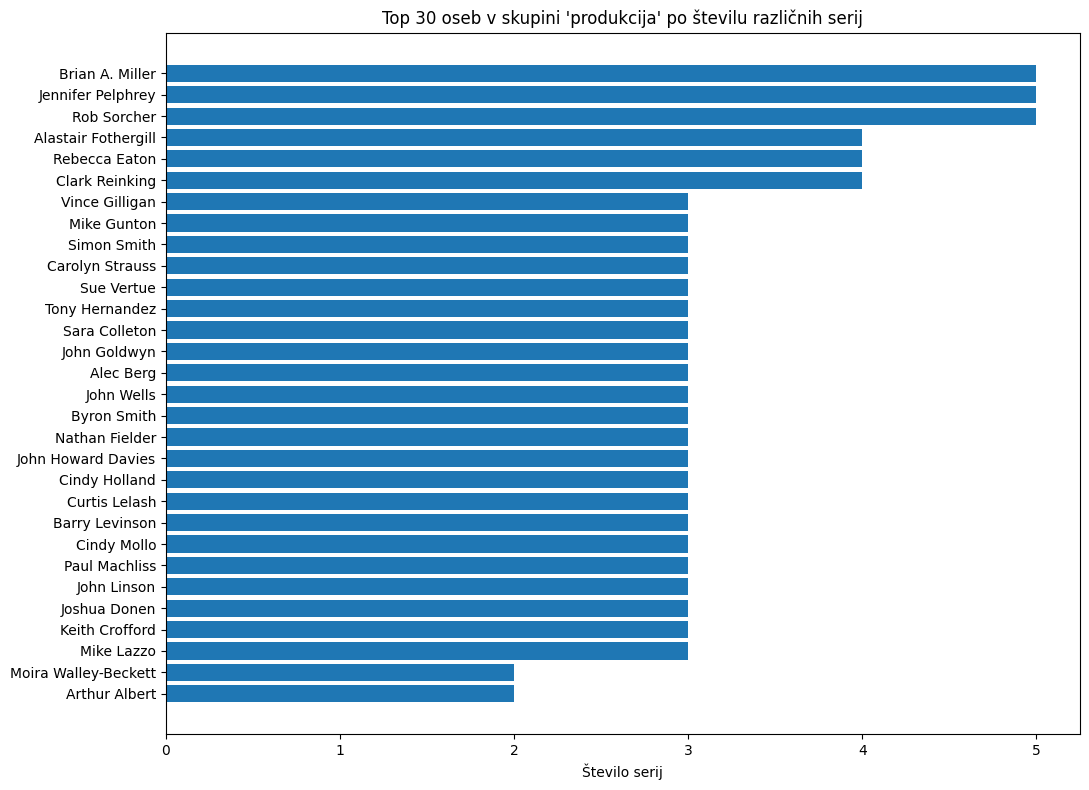

In [38]:
from helpers.people import (
    plot_involved_people,
    plot_number_of_apperances_for_people_in_groups
)

plot_involved_people(df)
plot_number_of_apperances_for_people_in_groups(df)